In [ ]:
import zipfile
import os
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Outline
* [Download Data](#Download-Data)
* [Data Exploration](#Data-Exploration)
* [Data Preprocessing](#Data-Preprocessing)

## Download Data
- Download data ffrom the repo
- Unzip the data from dataroot folder (with dataroot as the folder default)
- read in sign names from csv file

In [ ]:
def unzip_traffic_signs(directory='dataroot/'):
    """
    Unzips traffic sign files from a specified directory.

    Args:
        directory (str): The directory path where the traffic sign files are located. 
                         Defaults to 'dataroot/'.

    Raises:
        Exception: If an error occurs during the unzipping process, the exception is printed.

    Returns:
        None: The function does not return any value.
    """
    try:
        for file in os.listdir(directory):
            print(file)
            if file.endswith('.zip'):
                print('Unzipping ' + file)
                with zipfile.ZipFile(directory + file, 'r') as zip_ref:
                    print('Extracting ' + file)
                    zip_ref.extractall(directory)
    except Exception as e:
        print(e)

In [ ]:
def download_traffic_signs(directory='dataroot/', unzip_data=False, data_zip_link=[
    'https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_1.zip',
    'https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_2.zip',
    'https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_3.zip'
]):
    """
    Downloads traffic sign data from specified links and optionally unzips the data files.

    Args:
        directory (str): The directory path where the data files will be downloaded. 
                        Defaults to 'dataroot/'.
        unzip_data (bool): Whether to unzip the downloaded data files or not. 
                        Defaults to False.
        data_zip_link (list): A list of URLs pointing to the data zip files. 
                            Defaults to a list of three URLs.

    Raises:
        Exception: If an error occurs during the downloading or unzipping process, the exception is printed.

    Returns:
        None: The function does not return any value.
    """
    try:
        !mkdir $directory
        try:
            for link in data_zip_link:
                !wget -P $directory $link
                print(f"Data file {link} downloaded")
            if unzip_data:
                unzip_traffic_signs(directory)
        except Exception as e:
            print('Error downloading data')
            print(e)
    except Exception as e:
        print('Error making directory')
        print(e)    

In [ ]:
def download_traffic_names(sign_name_url ="https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/signnames.csv"):
    """
    Downloads traffic sign names from a specified URL.

    Args:
        sign_name_url (str): The URL pointing to the sign names file. 
                            Defaults to a URL pointing to a CSV file.

    Raises:
        Exception: If an error occurs during the downloading process, the exception is printed.

    Returns:
        None: The function does not return any value.
    """
    try:
        df = pd.read_csv(sign_name_url)
        signnames = pd.Series(df.SignName.values,index=df.ClassId).to_dict()
        return signnames    
    except Exception as e:
        print('Error downloading sign names')
        print(e)

In [ ]:
def load_traffic_images(directory='dataroot/'):
    """
    Loads traffic sign images from a specified directory.

    Args:
        directory (str): The directory path where the traffic sign files are located.
                        Defaults to 'dataroot/'.
                        
    Raises:
        Exception: If an error occurs during the loading process, the exception is printed.

    Returns:
        list: A list of traffic sign images.    
    """
    signimages = []
    try:
        for file in os.listdir(directory):
            if file.endswith('.p'):
                signimages.append(pickle.load(open(directory + file, 'rb')))
        return signimages
    except Exception as e:
        print('Error loading images')
        print(e)

In [ ]:
train, valid, test = load_traffic_images(directory='tests/')

## Data Exploration
- Look and sign image name keys
- Get shape of training, validation and test data
- Plot a sample of the images
- Pixel intensity distribution
- Plot a histogram of the number of images per class

## Data Preprocessing
- Convert to grayscale
- Normalize the data
- Shuffle the data

In [ ]:
def normalize_images(image_dict):
    """
    Normalizes traffic sign images.

    Args:
        image_dict (dict): A dictionary containing traffic sign images.

    Returns:
        dict: A dictionary containing normalized traffic sign images.
    """
    features = image_dict['features']
    normalized_features = (features - np.mean(features)) / np.std(features)

    normalized_data_dict = image_dict.copy()
    normalized_data_dict['features'] = normalized_features

    return normalized_data_dict


In [78]:
def grayscale_conversion(image_dict):
    """
    Converts traffic sign images to grayscale.

    Args:
        image_dict (dict): A dictionary containing traffic sign images.

    Returns:
        dict: A dictionary containing grayscale traffic sign images.
    """
    features = image_dict['features']
    grayscale_features = np.sum(features/3, axis=3, keepdims=True)

    grayscale_data_dict = image_dict.copy()
    grayscale_data_dict['features'] = grayscale_features

    return grayscale_data_dict

In [81]:
normal_train = normalize_images(train)
grayscale_train = grayscale_conversion(train)
normal_gray_train = grayscale_conversion(normal_train)

In [ ]:
def plot_image(image_dict, index):
    """
    Plots a traffic sign image.

    Args:
        image_dict (dict): A dictionary containing traffic sign images.
        index (int): The index of the image to plot.
    """
    image = image_dict['features'][index]
    plt.imshow(image)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


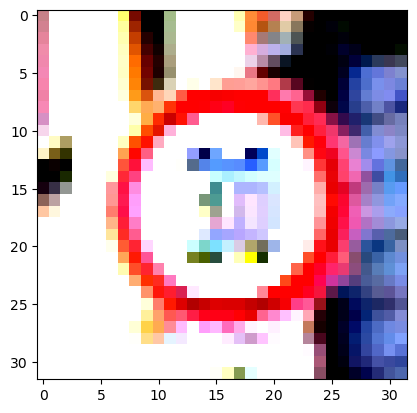

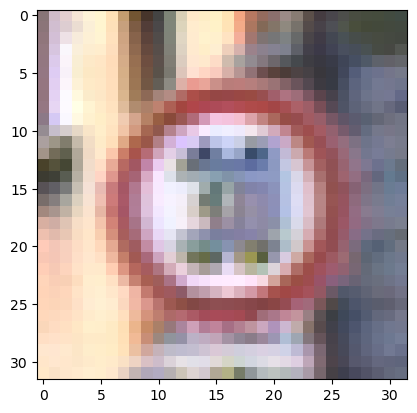

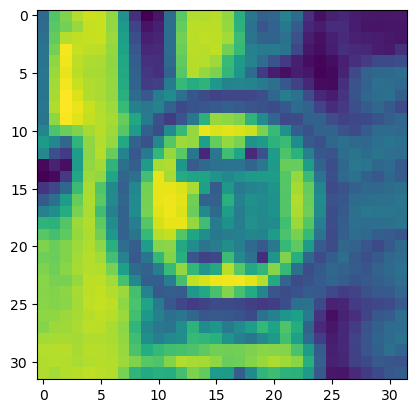

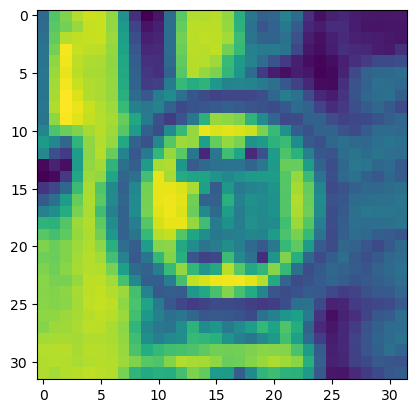

In [82]:
plot_image(normal_train, 100)
plot_image(train, 100)
plot_image(grayscale_train, 100)
plot_image(normal_gray_train, 100)